In [4]:
pip install scikit-learn

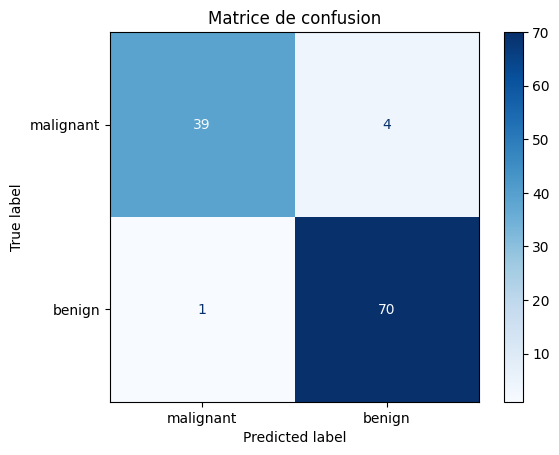

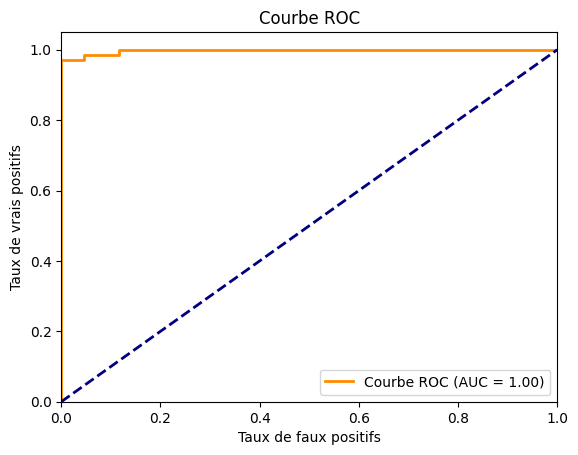

.
----------------------------------------------------------------------
Ran 1 test in 4.703s

OK


In [9]:
import unittest
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class TestLogisticCancerModel(unittest.TestCase):

    def setUp(self):
        # Charger le dataset de cancer
        self.data = load_breast_cancer()
        self.X = self.data.data
        self.y = self.data.target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.clf = LogisticRegression(max_iter=10000)
        self.clf.fit(self.X_train, self.y_train)

    def test_model_performance(self):
        # Calculer les prédictions
        y_pred = self.clf.predict(self.X_test)

        # Calculer la matrice de confusion
        cm = confusion_matrix(self.y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.data.target_names)

        # Afficher la matrice de confusion
        cm_display.plot(cmap='Blues')
        plt.title("Matrice de confusion")
        plt.show()

        # Assertion pour vérifier que la matrice de confusion contient des valeurs positives
        self.assertTrue(np.all(cm >= 0), "La matrice de confusion doit contenir uniquement des valeurs positives")

        # Calculer la courbe ROC
        y_probs = self.clf.predict_proba(self.X_test)[:, 1]  # Prédictions de probabilité pour la classe positive
        fpr, tpr, thresholds = roc_curve(self.y_test, y_probs)
        auc = roc_auc_score(self.y_test, y_probs)

        # Afficher la courbe ROC
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Taux de faux positifs')
        plt.ylabel('Taux de vrais positifs')
        plt.title('Courbe ROC')
        plt.legend(loc="lower right")
        plt.show()

        # Assertion pour vérifier que l'AUC est supérieur à un seuil
        self.assertGreater(auc, 0.8, "L'AUC devrait être supérieur à 0.8 pour une bonne performance")

# Exécuter les tests sans erreur dans Google Colab
def run_tests():
    # Initialisation d'un test suite et d'un runner de test pour éviter l'erreur dans un notebook
    suite = unittest.TestLoader().loadTestsFromTestCase(TestLogisticCancerModel)
    unittest.TextTestRunner().run(suite)

run_tests()